In [1]:
# https://www.kaggle.com/rakeshrau/social-network-ads

In [2]:
#Import the libraries and the dataset into a dataframe
import pandas as pd
import numpy as np
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
#Show the first 5 records of the df
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Used LabelEncoder because the dataset contains character variables
from sklearn.preprocessing import LabelEncoder

gender_df = pd.DataFrame(df, columns=['Gender'])
le = LabelEncoder()

# Assigning numerical values and storing in another column
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df[['Gender','Gender_encoded']].drop_duplicates()

,Gender,Gender_encoded
0,Male,1
2,Female,0


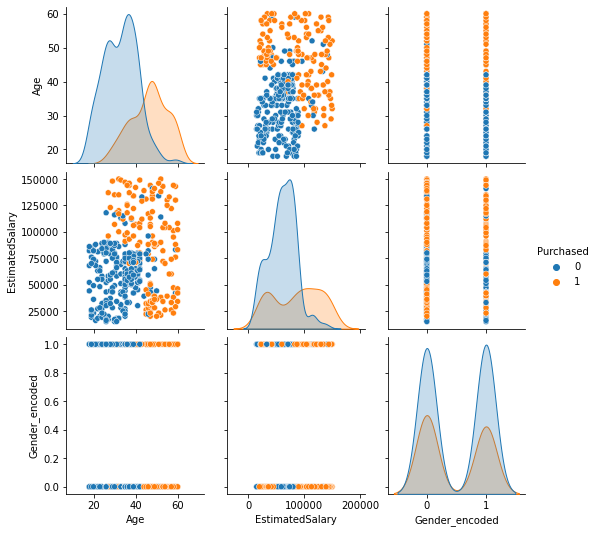

In [5]:
import seaborn as sns
sns.pairplot(df.drop('User ID',axis=1),hue='Purchased')

In [6]:
#Slicing the dataset into independent and dependent variables
X=df.drop(['User ID','Purchased','Gender'], axis=1)
y=df['Purchased']

In [7]:
X.head()

,Age,EstimatedSalary,Gender_encoded
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [8]:
#Split the dataset values into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
#Feature scaling to the training and test set of independent variables for reducing the size to smaller values
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [10]:
#Create and train the KNN model with the training set. Determine the accuracy for the KNN model where k in range(1,10) to
#discover the best value for k neighbors - trying to avoi the Curse of Dimensionality
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc=[]
for i in range(1,10):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

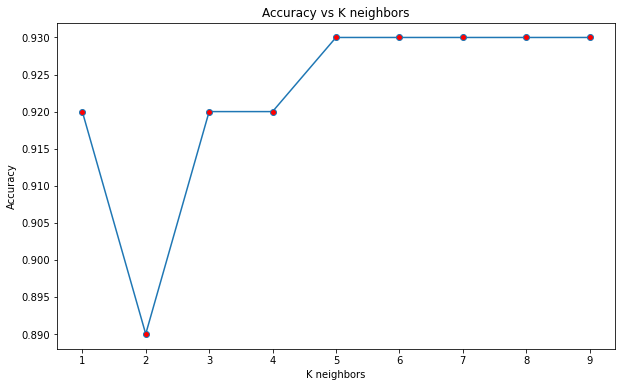

In [11]:
#Plotting the KNN algorithm accuracy vs k neighbors
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Accuracy vs K neighbors')
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.plot(range(1,10),acc,marker='o',mfc='red')

In [12]:
#Conclusion: Best results are met for k=5